# Euchre

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys

sys.path.insert(0, 'C:/Users/jerem/Desktop/nonsense/euchre/')

from utils import EuchreGame

### Create Game object, check attributes

In [76]:
euchre_game = EuchreGame()

In [77]:
# create show_all_game_attributes method?
euchre_game.score

{'t1': 0, 't2': 0}

In [78]:
euchre_game.dealer

'p1'

In [79]:
euchre_game.next_to_deal

['p2', 'p3', 'p4', 'p1']

In [80]:
euchre_game.print_score()

Current score: 0-0


In [81]:
deck_of_cards = euchre_game.shuffle_deck_of_cards()
for card in deck_of_cards:
    print(card, end=',')

9_S,9_C,9_H,9_D,T_S,T_C,T_H,T_D,J_S,J_C,J_H,J_D,Q_S,Q_C,Q_H,Q_D,K_S,K_C,K_H,K_D,A_S,A_C,A_H,A_D,

In [82]:
euchre_game.tm_call_trump_strategy

{'t1': None, 't2': None}

In [83]:
euchre_game.tm_play_card_strategy

{'t1': None, 't2': None}

### Deal cards

In [66]:
player_hands, card_flipped_up = euchre_game.deal_hand()

In [67]:
player_hands

{'p1': ['K_S', 'A_S', '9_C', 'K_C', '9_D'],
 'p2': ['Q_H', '9_S', 'T_C', 'K_D', 'T_H'],
 'p3': ['T_D', 'J_D', 'K_H', 'J_C', 'J_S'],
 'p4': ['Q_S', 'T_S', 'J_H', '9_H', 'Q_D']}

In [68]:
card_flipped_up

'Q_C'

### Choose suit for trump

In [85]:
if euchre_game.eval_flipped_card(suit='S', 
                                 hand=['K_S', 'A_H', 'A_C', 'J_C', 'J_S'], 
                                 player='p1'):
    print('order up trump')

In [86]:
if euchre_game.eval_flipped_card(suit='S', 
                                 hand=['K_S', 'A_H', 'A_S', 'J_C', 'J_S'], 
                                 player='p2'):
    print('order up trump')

order up trump


In [87]:
euchre_game.choose_open_trump(hand=['K_S', 'A_S', 'A_C', 'J_C', 'J_S'], 
                  card_flipped_up='A_D')

'S'

In [88]:
euchre_game.choose_open_trump(hand=['K_S', 'A_H', 'A_C', 'J_C', 'J_S'], 
                  card_flipped_up='T_S')

In [89]:
calling_player, trump = euchre_game.determine_trump(card_flipped_up=card_flipped_up,
                           player_hands=player_hands)

In [90]:
print(player_hands)
print(calling_player)
print(trump)

{'p1': ['K_S', 'A_S', '9_C', 'K_C', '9_D'], 'p2': ['Q_H', '9_S', 'T_C', 'K_D', 'T_H'], 'p3': ['T_D', 'J_D', 'K_H', 'J_C', 'J_S'], 'p4': ['Q_S', 'T_S', 'J_H', '9_H', 'Q_D']}
None
None


### Play trick

In [28]:
cards_in_play, player_led = euchre_game.play_trick(player_hands=player_hands, 
                                                   trump='H', 
                                                   next_to_play_list=euchre_game.next_to_deal, 
                                                   cards_played_this_hand = [], 
                                                   verbose=True)

Leading off with lowest overall card- Player p2 plays 9_H, Following suit with lowest card- Player p3 plays T_H, Following suit with lowest card- Player p4 plays Q_H, Following suit with lowest card- Player p1 plays K_H, 

In [29]:
cards_in_play

{'p2': '9_H', 'p3': 'T_H', 'p4': 'Q_H', 'p1': 'K_H'}

In [30]:
player_led

'p2'

#### Determine trick winner

In [31]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'J_C', 'p4': 'J_H', 'p1': 'A_S'}, 
                           trump='S', 
                           player_led=player_led, 
                                   verbose=True)

p3 wins trick


'p3'

In [32]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'J_C', 'p4': 'J_S', 'p1': 'A_S'}, 
                           trump='D', 
                           player_led=player_led, 
                                   verbose=False)

'p1'

In [35]:
trick_winner = euchre_game.determine_trick_winner(cards_in_play=cards_in_play,
                                           trump='H',
                                           player_led=player_led)

trick_winner

'p1'

In [36]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'J_H', 'p4': 'J_S', 'p1': 'A_D'}, 
                           trump='D', 
                           player_led='p2', 
                                   verbose=False)

'p3'

In [37]:
euchre_game.determine_trick_winner(cards_in_play={'p2': '9_S', 'p3': 'T_D', 'p4': 'J_S', 'p1': 'A_D'}, 
                           trump='D', 
                           player_led='p2', 
                                   verbose=False)

'p1'

#### Swap card in dealer hand

In [38]:
new_dealer_hand = euchre_game.swap_dealer_card(card_flipped_up='A_S', dealer_hand=['J_H', 'A_D', '9_H', 'K_S', 'J_D'], 
                                               verbose=True)
new_dealer_hand

Dealer discards 9_H and picks up A_S


['J_H', 'A_D', 'K_S', 'J_D', 'A_S']

In [39]:
new_dealer_hand = euchre_game.swap_dealer_card(card_flipped_up='9_S', dealer_hand=['J_H', 'T_D', 'T_H', 'K_S', 'J_D'], 
                                               verbose=True)
new_dealer_hand

Dealer discards T_D and picks up 9_S


['J_H', 'T_H', 'K_S', 'J_D', '9_S']

### Play card

In [40]:
euchre_game.play_card(hand=['J_H', 'A_D', '9_H', 'K_S', 'J_D'], 
                      trump='S',
                      cards_in_play={'p2': 'J_D', 'p3': 'A_D', 'p1': '9_D'}, 
                      player_led='p1',
                      cards_played_this_hand=[], 
                      suit_led='D')

'J_D'

In [41]:
euchre_game.play_card(hand=['J_H', 'A_D', '9_H', 'K_S', 'J_D'], 
                      trump='D',
                      cards_in_play={'p2': 'J_D', 'p3': 'A_D', 'p1': '9_D'}, 
                      player_led='p1',
                      cards_played_this_hand=[], 
                      suit_led='D')

'J_D'

#### Play lead card

In [42]:
euchre_game.play_lead_card(hand=['9_D', 'T_C', '9_C', 'A_S', 'A_C'], 
               trump='S', 
               cards_played_this_hand=['J_S', 'J_C'])

'9_D'

In [43]:
euchre_game.play_lead_card(hand=['T_D', 'T_C', 'Q_C', 'A_D', 'A_C'], 
               trump='S', 
               cards_played_this_hand=['J_S', 'J_C'])

'T_D'

In [44]:
from utils import play_random_card

In [45]:
play_random_card(hand=['9_D', 'T_C', '9_C', 'J_S', 'A_C'], 
                             suit_led=None)

'9_D'

In [46]:
play_random_card(hand=['9_D', 'T_C', '9_C', 'J_S', 'A_C'], 
                             suit_led='D')

'9_D'

In [47]:
play_random_card(hand=['9_D', 'T_C', '9_C', 'J_S', 'A_C'], 
                             suit_led='C')

'T_C'

In [48]:
from utils import get_lowest_card

In [49]:
get_lowest_card(hand=['9_D', 'T_C', '9_C', 'J_S', 'A_C'])

'9_D'

In [186]:
get_lowest_card(hand=['T_D', 'T_C', 'T_H', 'J_S', 'A_C'])

'T_D'

In [51]:
from utils import get_lowest_card_in_suit

In [52]:
get_lowest_card_in_suit(hand=['A_D', 'T_C', 'T_D', 'J_S', 'A_C'], 
                        suit='D')

'T_D'

In [185]:
# this should return J_S if trump
get_lowest_card_in_suit(hand=['A_D', 'T_S', 'T_D', 'J_S', 'A_H'], 
                        suit='C')

In [178]:
def find_highest_remaining_trump(trump, 
                                 cards_played_this_hand, 
                                 verbose=False):
    """
    Function to return the highest remaining overall trump card that has not been played
    If all trump has been played, returns None
    """
    trump_hierarchy_dict = {
        'D': ['J_D', 'J_H', 'A_D', 'K_D', 'Q_D', 'T_D', '9_D'],
        'H': ['J_H', 'J_D', 'A_H', 'K_H', 'Q_H', 'T_H', '9_H'],
        'C': ['J_C', 'J_S', 'A_C', 'K_C', 'Q_C', 'T_C', '9_C'],
        'S': ['J_S', 'J_C', 'A_S', 'K_S', 'Q_S', 'T_S', '9_S']
    }
    highest_remaining_trump = None
    for idx, trump_card in enumerate(trump_hierarchy_dict[trump]):
        if trump_card not in cards_played_this_hand:
            highest_remaining_trump = trump_card
            if verbose:
                print(f'Highest trump card remaining {highest_remaining_trump}')
            return highest_remaining_trump
    return highest_remaining_trump

In [179]:
find_highest_remaining_trump(trump='D', 
                             cards_played_this_hand=[], 
                             verbose=True)

Highest trump card remaining J_D


'J_D'

In [180]:
find_highest_remaining_trump(trump='H', 
                             cards_played_this_hand=['J_H', 'J_D', 'A_H'], 
                             verbose=True)

Highest trump card remaining K_H


'K_H'

In [183]:
find_highest_remaining_trump(trump='H', 
                             cards_played_this_hand=['J_H', 'J_D', 'A_H', 'K_H', 'Q_H', 'T_H', '9_H'], 
                             verbose=True)

In [190]:
find_highest_remaining_trump(trump='H', 
                             cards_played_this_hand=['J_H', 'J_D', 'A_H', 'K_H', 'Q_H', 'T_H', '9_H'], 
                             verbose=True)

Highest trump card remaining Q_H


'Q_H'

### Play full game

In [187]:
%%time

euchre_game = EuchreGame()
euchre_game.play_full_game(verbose=True)

Hand #0- Dealer: p1; Player Hands: {'p1': ['9_D', 'J_D', 'T_H', 'K_H', 'Q_C'], 'p2': ['Q_H', 'T_S', 'J_H', 'K_D', '9_H'], 'p3': ['K_C', 'T_D', 'T_C', 'K_S', 'Q_S'], 'p4': ['J_S', '9_C', '9_S', 'Q_D', 'A_S']}
Player p2 has chosen H as trump
Leading off with lowest overall card- Player p2 plays 9_H, Current winning player p2
No trump, playing lowest card in hand- Player p3 plays T_D, Current winning player p2
Teammate winning, no follow suit, play lowest card- Player p4 plays 9_C, Current winning player p2
Following suit with lowest card- Player p1 plays T_H, p1 wins trick
Leading off with highest non-trump- Player p1 plays 9_D, Current winning player p1
Following suit with lowest card- Player p2 plays K_D, Current winning player p2
No trump, playing lowest card in hand- Player p3 plays T_C, Current winning player p2
Teammate winning, following suit with lowest card- Player p4 plays Q_D, p2 wins trick
Leading off with lowest overall card- Player p2 plays T_S, Current winning player p2
Fo

In [54]:
euchre_game.score

{'t1': 3, 't2': 10}

In [ ]:
len(hand_results)

#### Profile performance

In [97]:
%%prun

euchre_game = EuchreGame()
euchre_game.play_full_game(verbose=False)

### Loop through games played, collect strategy results

In [102]:
from scipy.stats import ttest_ind

In [159]:
%%time

N_GAMES_TO_PLAY = 1000

strategy_results = {'t1_wins':0, 't1_scores':[], 't2_scores':[]}

for i in range(N_GAMES_TO_PLAY):
    euchre_game = EuchreGame()
    euchre_game.tm_call_trump_strategy['t2'] = 'NEW'  # set team 2 call trump strategy to NEW
    #euchre_game.tm_play_card_strategy['t2'] = 'random'  # set team 2 play card strategy to random
    euchre_game.play_full_game(verbose=False)
    if euchre_game.score['t1'] > euchre_game.score['t2']:
        strategy_results['t1_wins'] += 1
    strategy_results['t1_scores'].append(euchre_game.score['t1'])
    strategy_results['t2_scores'].append(euchre_game.score['t2'])

Wall time: 4.51 s


In [160]:
print(f"""Team 1 strategy won {strategy_results['t1_wins']}/{N_GAMES_TO_PLAY} games \
({strategy_results['t1_wins']/N_GAMES_TO_PLAY*100}%)""")

Team 1 strategy won 502/1000 games (50.2%)


#### T-test for statistically significant difference in means between t1 and t2 scores

In [161]:
ttest_ind(strategy_results['t1_scores'], strategy_results['t2_scores'])

Ttest_indResult(statistic=0.0823827367621197, pvalue=0.9343506154133684)

### Plot results

In [157]:
import matplotlib.pyplot as plt

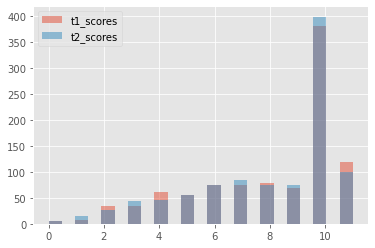

In [162]:
plt.style.use('ggplot')
plt.hist(strategy_results['t1_scores'], bins=23, alpha=0.5, label='t1_scores')
plt.hist(strategy_results['t2_scores'], bins=23, alpha=0.5, label='t2_scores')
plt.legend(loc='upper left')

## Loop through games played, collect hand_results

In [101]:
euchre_game = EuchreGame()
hand_results = euchre_game.play_full_game(return_all_hands_results=True, verbose=False)
hand_results[0]

{'player_hands': {'p1': ['9_C', 'K_H', 'K_D', '9_D', '9_S'],
  'p2': ['J_S', 'J_D', 'T_S', 'J_H', 'K_S'],
  'p3': ['A_S', 'J_C', 'Q_H', '9_H', 'Q_S'],
  'p4': ['T_D', 'T_H', 'Q_C', 'K_C', 'T_C']},
 'calling_player': 'p2',
 'trump': 'S',
 'dealer': 'p1',
 'hand_score': {'t1': 2, 't2': 0},
 'trick_winners': {'p2': 2, 'p3': 2, 'p4': 0, 'p1': 1}}

In [112]:
import pandas as pd

In [113]:
from utils import return_off_suit

In [116]:
def return_df_from_hand_results(hand_results_dict):
    fields_to_collect = ['tricks_won',
                         'is_calling_player',
                         'has_right', 
                         'has_left',
                         'has_Atrump',
                         'has_Ktrump',
                         'has_Qtrump',
                         'num_trump',
                         'num_off_A',
                         'num_off_K',
                         'num_off_Q']
    results_list = []
    for player in hand_results_dict['trick_winners'].keys():
        player_hand_results = dict.fromkeys(fields_to_collect,0)
        player_hand_results['tricks_won'] = hand_results_dict['trick_winners'][player]
        if player == hand_results_dict['calling_player']:
            player_hand_results['is_calling_player'] = 1
        player_hand_results['num_trump'] = 0
        for idx, card in enumerate(hand_results_dict['player_hands'][player]):
            if card[-1] == hand_results_dict['trump']:
                player_hand_results['num_trump'] += 1
                if card[0] == 'A':
                    player_hand_results['has_Atrump'] = 1
                if card[0] == 'K':
                    player_hand_results['has_Ktrump'] = 1
                if card[0] == 'Q':
                    player_hand_results['has_Qtrump'] = 1
                if card[0] == 'J':
                    player_hand_results['has_right'] = 1
            else:
                if card[0] == 'A':
                    player_hand_results['num_off_A'] += 1
                if card[0] == 'K':
                    player_hand_results['num_off_K'] += 1
                if card[0] == 'Q':
                    player_hand_results['num_off_Q'] += 1
                if card[0] == 'J':
                    if return_off_suit(card[-1]) == trump:
                        player_hand_results['has_left'] = 1
                        player_hand_results['num_trump'] += 1
        results_list.append(player_hand_results)
    return pd.DataFrame(results_list)

In [117]:
results_df = return_df_from_hand_results(all_hand_results[0][0])
results_df.shape

(4, 11)

In [118]:
results_df.head()

,tricks_won,is_calling_player,has_right,has_left,has_Atrump,has_Ktrump,has_Qtrump,num_trump,num_off_A,num_off_K,num_off_Q
0,0,0,0,0,0,0,0,0,1,0,1
1,3,1,1,0,0,0,1,3,0,1,0
2,1,0,0,0,0,1,0,2,0,2,1
3,1,0,0,0,0,0,0,0,0,0,1


In [124]:
%%time

N_GAMES_TO_PLAY = 100

all_hand_results_df = pd.DataFrame()
for i in range(N_GAMES_TO_PLAY):
    euchre_game = EuchreGame()
    hand_results = euchre_game.play_full_game(return_all_hands_results=True, verbose=False)
    game_results_df = pd.DataFrame()
    for hand in hand_results:
        hand_results_df = return_df_from_hand_results(hand)
        game_results_df = pd.concat([game_results_df, hand_results_df])
    all_hand_results_df = pd.concat([all_hand_results_df, game_results_df])

Wall time: 2.25 s


In [125]:
all_hand_results_df.shape

(4832, 11)

In [126]:
all_hand_results_df.sort_values('tricks_won', ascending=False).head(10)

,tricks_won,is_calling_player,has_right,has_left,has_Atrump,has_Ktrump,has_Qtrump,num_trump,num_off_A,num_off_K,num_off_Q
2,5,1,1,0,1,0,1,4,0,0,0
1,5,1,1,0,0,1,0,3,1,0,0
2,5,1,1,0,0,0,1,3,0,1,0
0,5,1,1,0,0,1,1,3,0,1,0
0,5,1,1,0,0,1,0,3,0,1,1
3,5,1,1,0,0,1,0,3,0,1,0
2,5,1,1,0,0,1,1,3,0,2,0
0,5,1,1,0,0,0,0,3,0,1,0
1,5,1,1,0,0,0,1,3,0,1,0
1,5,1,1,0,1,1,0,4,0,0,0


In [127]:
# check hand with right bauer didn't take 0 tricks
assert all_hand_results_df[(all_hand_results_df['tricks_won']==0) & (all_hand_results_df['has_right']==1)].shape[0] == 0

In [128]:
all_hand_results_df.groupby(['has_right', 
                             'has_left', 
                            'has_Atrump', 
                            'has_Ktrump', 
                            # 'has_Qtrump',
                            ]).agg(avg_tricks=('tricks_won', 'mean'), num_hands=('has_right','count'))

avg_tricks  num_hands
has_right has_left has_Atrump has_Ktrump                       
0         0        0          0             0.656569       2641
                              1             1.484398        673
                   1          0             1.436293        259
                              1             2.086022         93
1         0        0          0             2.030882        680
                              1             2.750716        349
                   1          0             2.860000        100
                              1             3.081081         37

### Next steps for development

In [ ]:
# Build out play card strategy
    # add logic to check what cards have been played in hand so far
        # update cards_played_this_hand to dict to be able to tell which players played which cards
        # check what trump has been played, etc., if highest remain 
# Build out framework to evaluate statistical significance of different strategies
    # chart overlapping histograms of points scored for different strategies across hands
# Handle loners
    # add functionality to determine trump to check loner strategy, return loner_called boolean to play_hand
        # start with strategy to call loner when right/left and 4 total trump
    # update play_trick to pass in loner_called, remove partner of calling_player from next_to_play_list
    # update update_score function to take in loner_called parameter, return scores for loners
# Evaluate points scored for each hand type for each game
# Build advanced strategy for play_lead_card function to reduce number of suits in hand, play toward partner short-suits
# Build model to predict tricks taken from all_hand_results_df as training data set
# build out advanced strategy for dealer swapping out card_flipped_up to reduce number of suits in hand
# Code cleanup
    # Add tests to all functions

# Look into bug where player has top 4 trump cards but takes < 4 tricks
# BUG in all_hand_results - no has_left showing up

# Look at combinations of exactly unique hands, vs. unique types of hands

# Add consideration of calling up trump to include if partner is dealer, if player is dealer
# Add consideration of calling up trump to how high the card_flipped_up is - more likely if 9,T, less if J

# Can you "count on your partner for 1"? What is the average number of tricks taken by the partner of the calling player?
